# Relative free energies paper - freesolv

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


import numpy as np
import fortuna
from openeye import oechem,oedepict
import os
import matplotlib.pyplot as plt
import itertools
from perses.utils.openeye import createOEMolFromSDF, calculate_mol_similarity
import seaborn as sns
from perses.analysis import load_simulations, cycles,utils
from scipy.stats import linregress, kendalltau
import pickle

%matplotlib inline

##### Multiple networks can exist

/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


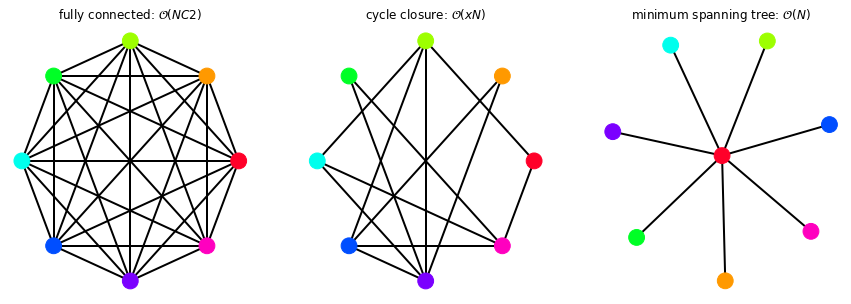

In [2]:
full = nx.Graph()
mst = nx.Graph()
cycle_closure = nx.Graph()

cmap = plt.cm.get_cmap('gist_rainbow')
n_nodes = 8

for i in range(n_nodes):
    full.add_node(i)
    mst.add_node(i)
    cycle_closure.add_node(i)
    
#fully connected
for i,j in itertools.combinations(range(n_nodes),2):
    full.add_edge(i,j)
    
# cycle
n_edges = 20
for _ in range(n_edges):
    cycle_closure.add_edge(np.random.randint(0, high=8),np.random.randint(0, high=8))
    
# MST
for j in range(n_nodes):
    mst.add_edge(0,j)

    
plt.figure(figsize=(15,5))
G=nx.grid_2d_graph(3,1)  #3x1 grid

pos=nx.spring_layout(G,iterations=100)

plt.subplot(131)
nx.draw_circular(full,node_color=range(n_nodes), node_size=250, cmap=cmap,width=2)
plt.title(r'fully connected: $\mathcal{O}(NC2)$')

plt.subplot(132)
nx.draw_circular(cycle_closure,node_color=range(n_nodes), node_size=250, cmap=cmap,width=2)
plt.title(r'cycle closure: $\mathcal{O}(xN)$')

plt.subplot(133)
pos = nx.circular_layout(list(range(n_nodes)), scale=2)
pos[0] = np.array([0, 0])
nx.draw(mst,node_color=range(n_nodes), node_size=250, cmap=cmap,width=2)
plt.title(r'minimum spanning tree: $\mathcal{O}(N)$')

# plt.savefig("four_grids.png")
plt.show()

In [3]:
molecules = []

os.chdir('/Users/brucemah/bin/relative-paper')
with open('freesolv_subset.txt') as f:
    for index,line in enumerate(f):
        if index < 8:
            molecules.append(load_simulations.Molecule(index,line))

##### Want to pick a subset of ligands that have a good distribution of hydration free energies

TODO - pick a set of molecules with a more uniform distribution

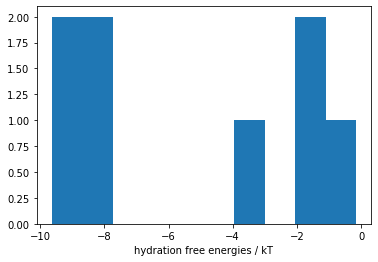

In [15]:
plt.hist([x.calc for x in molecules])
plt.xlabel('hydration free energies / kT')
plt.show()

In [16]:
all_sims = []

all_files = os.listdir()

run = []

for file in [x for x in all_files if x[0:3] == 'lig' and x[-3:] != '.pi']:
        i, j = file[3:].split('to')
        if f'lig{i}to{j}' in all_files:
            if f'lig{i}to{j}.pi' in all_files:
                print(f'found pickle. loading lig{i}to{j}.pi')
                x = pickle.load(open(f'lig{i}to{j}.pi','rb'))
                all_sims.append(x)
            else:
                print(f'loading lig{i}to{j}')
                x = load_simulations.Simulation(i,j)
                if x.hydrationdg is not None:
                    all_sims.append(x)

loading lig0to2


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig0to5


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig0to4


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig0to3


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig3to7


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig2to7


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig2to6


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig6to7


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig5to6


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig1to7


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig1to6


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig0to6


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig0to1


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig4to6


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig0to7


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies
loading lig2to3


/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistateanalyzer.py:1175: UserWarning: Warning: The openmmtools.multistate API is experimental and may change in future releases
  warnings.warn('Warning: The openmmtools.multistate API is experimental and may change in future releases')
/Users/brucemah/miniconda3/lib/python3.6/site-packages/openmmtools-0.18.2+0.g6b31737.dirty-py3.6-macosx-10.7-x86_64.egg/openmmtools/multistate/multistatereporter.py:116: UserWarning: Warning: The openmmtools.multistate API is experimen

Both solvent and complex legs need to be run for binding free energies


In [17]:
import networkx as nx
G = nx.DiGraph(system='freesolv')

labels = {}
for m in molecules[0:8]:
    G.add_node(m.index,name=m.name,molecule=m)
    labels[m.index] = m.name

In [18]:
for sim in all_sims:
    moleculeA = molecules[int(sim.ligA)]
    moleculeB = molecules[int(sim.ligB)]
    calc = moleculeA.calc - moleculeB.calc
    calcerr = moleculeA.calcerr - moleculeB.calcerr
    exp = moleculeA.exp - moleculeB.exp
    experr = moleculeA.experr - moleculeB.experr
    dg_noend = sim.vacdg_no_endstates - sim.soldg_no_endstates
    ddg_noend = (sim.vacvariance_no_endstates**0.5 + sim.solvariance_no_endstates**0.5)**2
    G.add_edge(int(sim.ligA), int(sim.ligB),exp=exp,experr=experr,calc=calc,calcerr=calcerr,
               dg=sim.hydrationdg,ddg=sim.hydrationdg_err,
                dg_nodisp=dg_noend,ddg_nodisp=ddg_noend)

/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


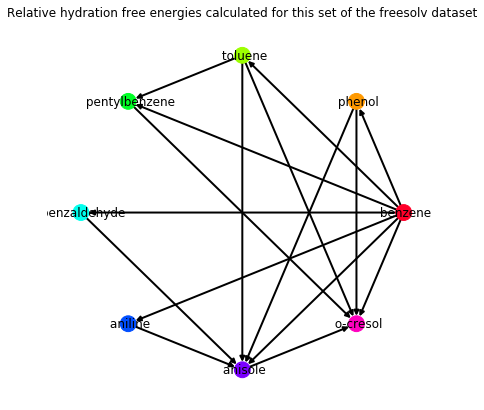

In [20]:
plt.figure(figsize=(7,7))

cmap = plt.cm.get_cmap('gist_rainbow')
plt.title('Relative hydration free energies calculated for this set of the freesolv dataset')
nx.draw_circular(G,labels=labels,node_color=range(len(labels)), node_size=250, cmap=cmap,width=2)

#### Comparing the results of different simulations:
dg - perses, with endstates
dg_nodisp - perses, without endstates
calc - freesolv simulation results


perses, without endstates has the best agreement with the freesolv simulation results

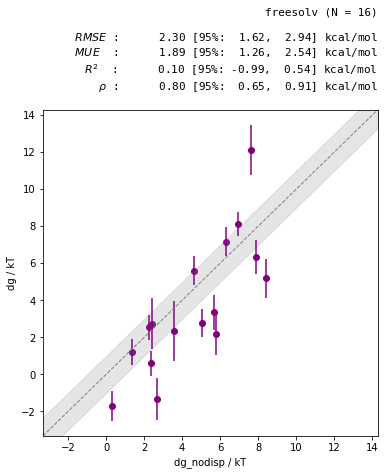

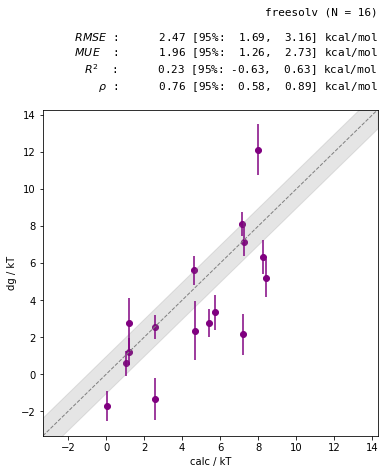

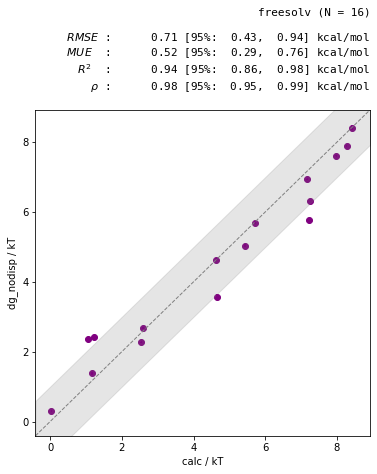

In [22]:
x = cycles.plot_comparison('dg_nodisp','dg',G,G,error=True,color='purple')
x = cycles.plot_comparison('calc','dg',G,G,error=True,color='purple')
x = cycles.plot_comparison('calc','dg_nodisp',G,G,error=True,color='purple')

#### Comparing the results of different simulations to experiment:

perses, without endstates has comparible experimental agreement to freesolv. With the endstates, experimental agreement worsens.

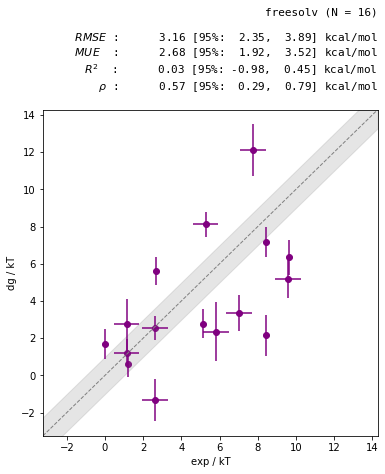

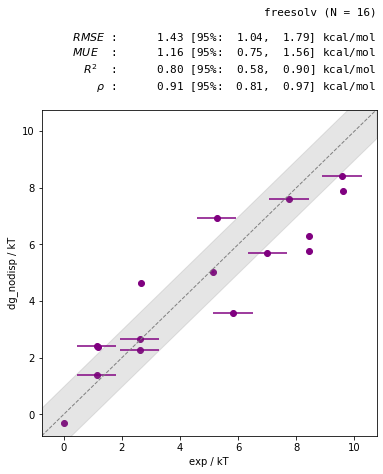

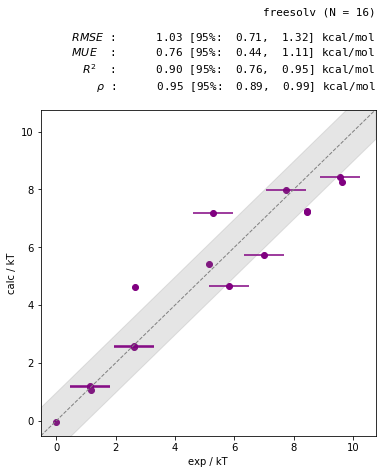

In [24]:
x = cycles.plot_comparison('exp','dg',G,G,error=True,color='purple')
x = cycles.plot_comparison('exp','dg_nodisp',G,G,error=True,color='purple')
x = cycles.plot_comparison('exp','calc',G,G,error=True,color='purple')

#### Analysing the free energy contributions of the endstates

In [26]:
dispersion_vacuum = {}
dispersion_solvent = {}

for a in molecules:
    dispersion_vacuum[str(a.index)] = []
    dispersion_solvent[str(a.index)] = []

    
# the unique atoms of ligand A, are being removed at lambda = 1 end, and unique atoms of ligand B are removed at lambda = 0
for sim in all_sims:
    dispersion_vacuum[sim.ligA].append(sim.vacf_ij[-1,-2])
    dispersion_solvent[sim.ligA].append(sim.solf_ij[-1,-2])
    dispersion_vacuum[sim.ligB].append(sim.vacf_ij[0,1])
    dispersion_solvent[sim.ligB].append(sim.solf_ij[0,1])    

#### the end state contribution of a ligand, should be invariant to the other ligand considered. i.e. for phenol, the valence term contribution of removing the dummy -O-H should be unaffected by what other unique atoms of the other ligand are in the system

##### the endstate contribution of any phase should be 
$\approx \frac{3\Delta N}{2}$, where $\Delta N$ is the difference in the number of atoms between the final alchemical state, and the unsamped endstate, but the difference between two phases (shown in green) of the same simulation should be $\approx 0$

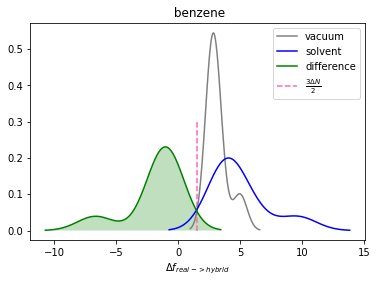

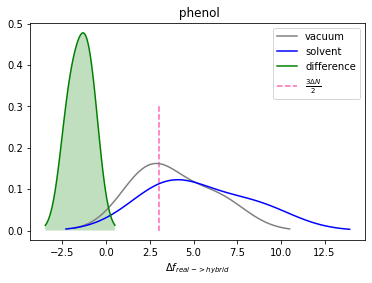

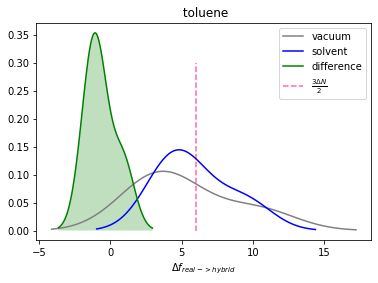

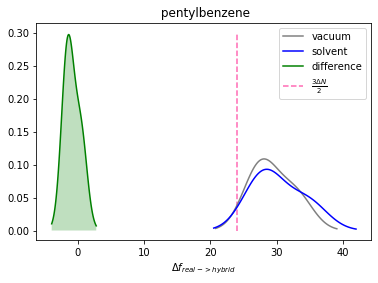

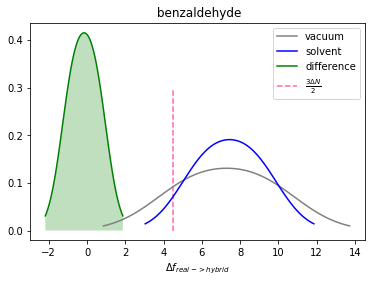

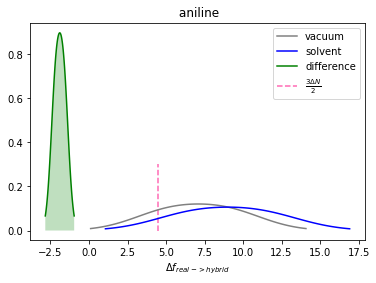

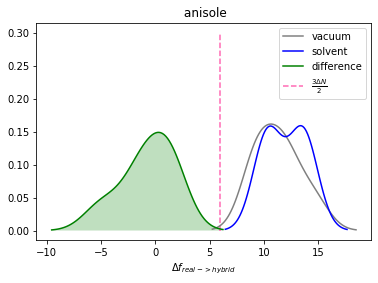

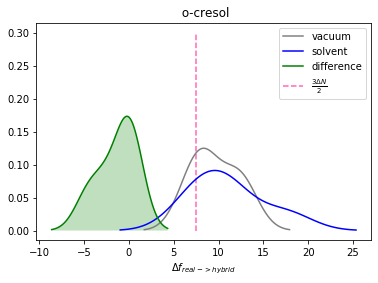

In [71]:
#atom number difference between the final alchemical state, and the unsampled endstate for each ligand
deltaN = {'benzene':1,'phenol':2,'toluene':4,'pentylbenzene':16,'benzaldehyde':3,'aniline':3,'anisole':4,'o-cresol':5}

for lig in dispersion_vacuum:
    if len(dispersion_vacuum[lig]) > 1:
        sns.kdeplot(dispersion_vacuum[lig],label='vacuum',color='gray')
        sns.kdeplot(dispersion_solvent[lig],label='solvent',color='blue')
        sns.kdeplot([(x-y) for x,y in zip(dispersion_vacuum[lig],dispersion_solvent[lig])],
                    shade=True,label='difference',color='green')
        plt.vlines(1.5 * deltaN[molecules[int(lig)].name.strip()],0.,0.3,color='hotpink',linestyle='dashed',label=r'$\frac{3\Delta N}{2}$')
        plt.title(f'{molecules[int(lig)].name}')
        plt.legend()
        plt.xlabel(r'$\Delta f_{real->hybrid}$')
        plt.show()

##### The agreement generally holds, that the $\Delta F_{real -> hybrid}$ is approximately $\frac{3\Delta N}{2}$, and the difference is generally centered on zero, suggests that the calculation is correct, but just that it introduces alot of variance

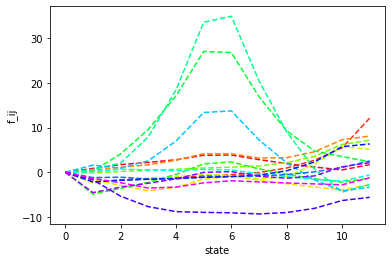

In [13]:
cmap = plt.cm.get_cmap('gist_rainbow')


for i,sim in enumerate(all_sims):
    plt.plot(sim.vacf_ij[0] - sim.solf_ij[0],color=cmap(i/len(all_sims)),linestyle='dashed')
#     plt.plot(sim.solf_ij[0],color=cmap(i/len(all_sims)))
plt.xlabel('state')   
plt.ylabel('f_ij')
plt.show()

In [51]:
# 10000 steps
# each step is 2 ps
stepsize=50
# stepsize=5
for sim in all_sims:
    if len(sim.vacdg_history) == 0:
        print(sim.directory)
        sim.historic_fes(stepsize=stepsize) # this is 1ps chunks of 20ns 

lig0to2
lig0to5
lig0to4
lig0to3
lig3to7
lig2to7
lig2to6
lig6to7
lig5to6
lig1to7
lig1to6
lig0to6
lig0to1
lig4to6
lig0to7
lig2to3


THESE ARE GOING TO BE THE RESULTS WITHOUT THE END-STATES


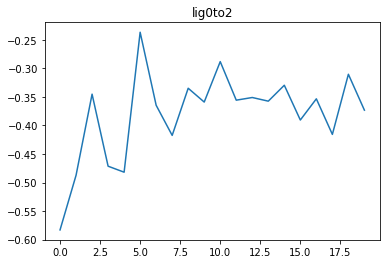

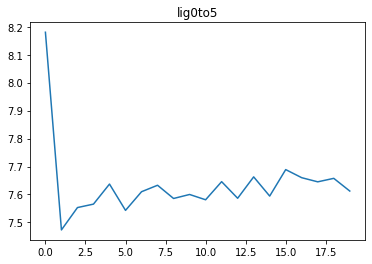

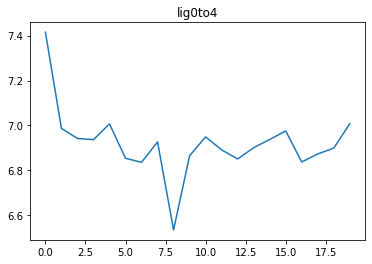

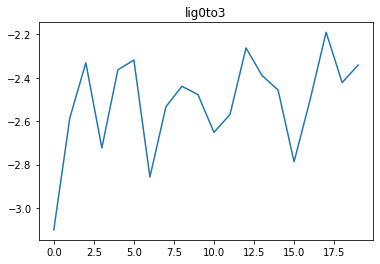

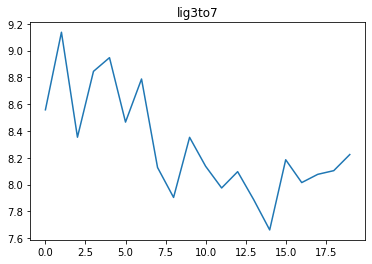

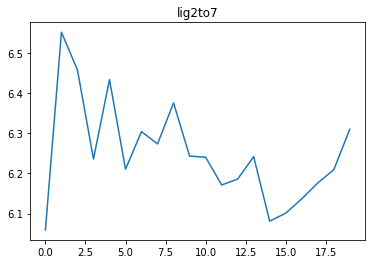

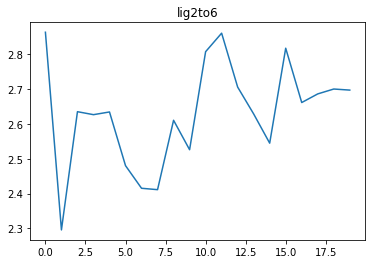

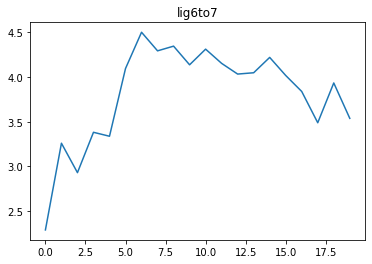

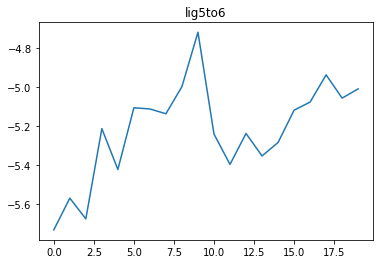

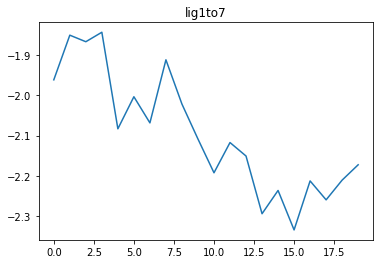

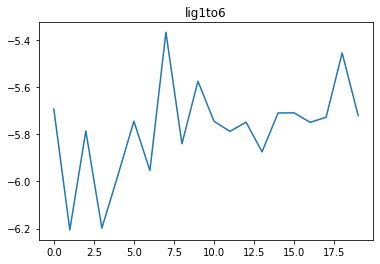

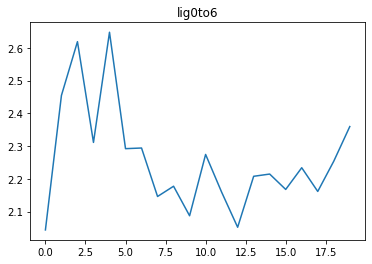

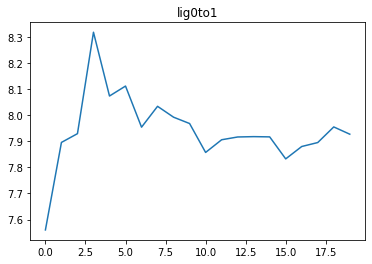

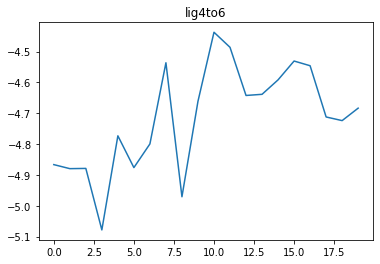

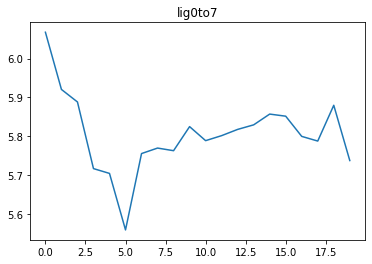

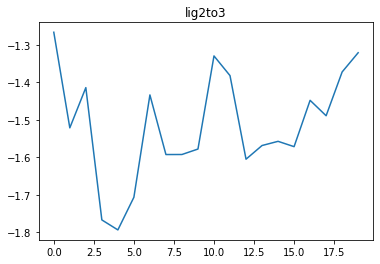

In [52]:
print('THESE ARE GOING TO BE THE RESULTS WITHOUT THE END-STATES')

for sim in all_sims:
    bfe_history = np.asarray(sim.vacdg_history) - np.asarray(sim.soldg_history)
    error_history = ((np.asarray(sim.vacvariance_history))**2 - (np.asarray(sim.vacvariance_history))**2)**0.5


    plt.plot(bfe_history)
    plt.fill_between(range(len(bfe_history)),bfe_history - error_history, bfe_history + error_history)
    plt.title(sim.directory)
    plt.show()

In [53]:
# for sim in all_sims:
#     if not os.path.isfile(f"{sim.directory}.pi"):
#         pickle.dump( sim, open( f"{sim.directory}.pi", "wb" ) )

##### Statistical fluctuation is (from DiffNet paper):

$s_e$ = $\sqrt{n_e \sigma ^2 _e}$

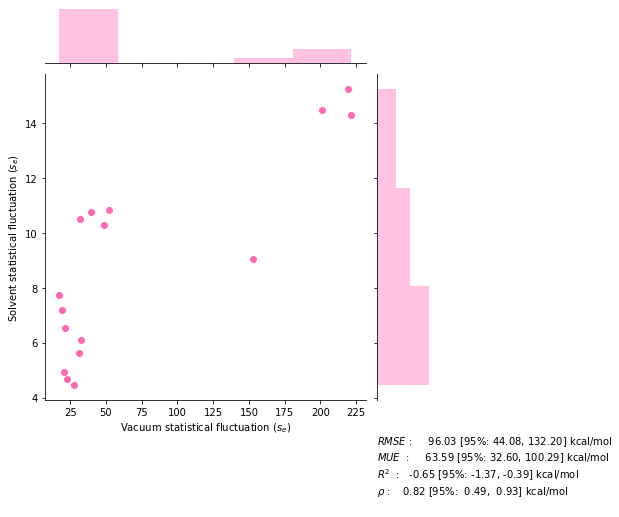

In [67]:
def var_to_statistical_fluc(var,n=1):
#     return np.log10(var**(-1))
    return (var*n)**-0.5


x = [var_to_statistical_fluc(sim.vacvariance_no_endstates) for sim in all_sims]
y = [var_to_statistical_fluc(sim.solvariance_no_endstates) for sim in all_sims]
#plot variance correlation
g = sns.jointplot(x, y,color='hotpink').set_axis_labels(r'Vacuum statistical fluctuation ($s_e$)',r'Solvent statistical fluctuation ($s_e$)')


stats = {
    (statistic) : cycles.bootstrap_statistic(np.asarray(x),np.asarray(y), statistic=statistic)
    for statistic in ('RMSE', 'MUE', 'R2', 'rho')
}


title = r"""
$RMSE$ :     {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
$MUE$  :     {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
$R^2$  :   {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
$\rho$ :   {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
""".format(
           stats[('RMSE')]['mean'], stats[('RMSE')]['low'], stats[('RMSE')]['high'],
           stats[('MUE')]['mean'], stats[('MUE')]['low'], stats[('MUE')]['high'],
           stats[('R2')]['mean'], stats[('R2')]['low'], stats[('R2')]['high'],
           stats[('rho')]['mean'], stats[('rho')]['low'], stats[('rho')]['high'],
           )
slope, intercept, r_value, _value, std_err = linregress(np.log10(x),np.log10(y))
# figure out how to control the text placement better
plt.text(0,0,title)
plt.show()
# print(title)

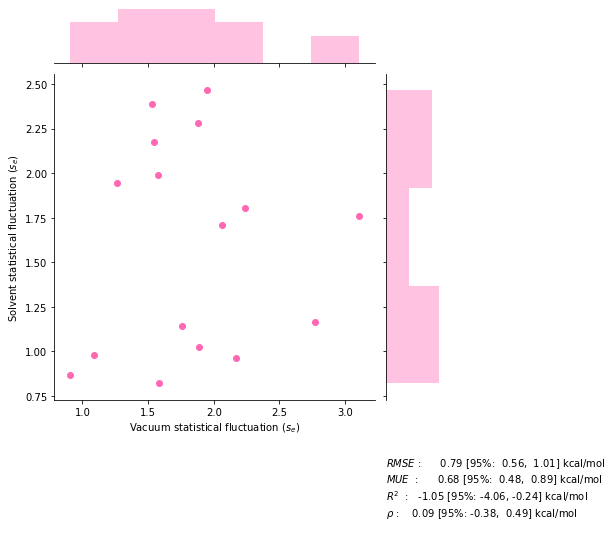

In [55]:
x = [var_to_statistical_fluc(sim.vacvariance) for sim in all_sims]
y = [var_to_statistical_fluc(sim.solvariance) for sim in all_sims]
#plot variance correlation
g = sns.jointplot(x, y,color='hotpink').set_axis_labels(r'Vacuum statistical fluctuation ($s_e$)',r'Solvent statistical fluctuation ($s_e$)')


stats = {
    (statistic) : cycles.bootstrap_statistic(np.asarray(x),np.asarray(y), statistic=statistic)
    for statistic in ('RMSE', 'MUE', 'R2', 'rho')
}


title = r"""
$RMSE$ :     {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
$MUE$  :     {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
$R^2$  :   {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
$\rho$ :   {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
""".format(
           stats[('RMSE')]['mean'], stats[('RMSE')]['low'], stats[('RMSE')]['high'],
           stats[('MUE')]['mean'], stats[('MUE')]['low'], stats[('MUE')]['high'],
           stats[('R2')]['mean'], stats[('R2')]['low'], stats[('R2')]['high'],
           stats[('rho')]['mean'], stats[('rho')]['low'], stats[('rho')]['high'],
           )

# figure out how to control the text placement better
plt.text(0,0,title)
plt.show()
# print(title)

THIS PLOT MAKES IT LOOKS LIKE THE FLUX CAN BE NEGATIVE


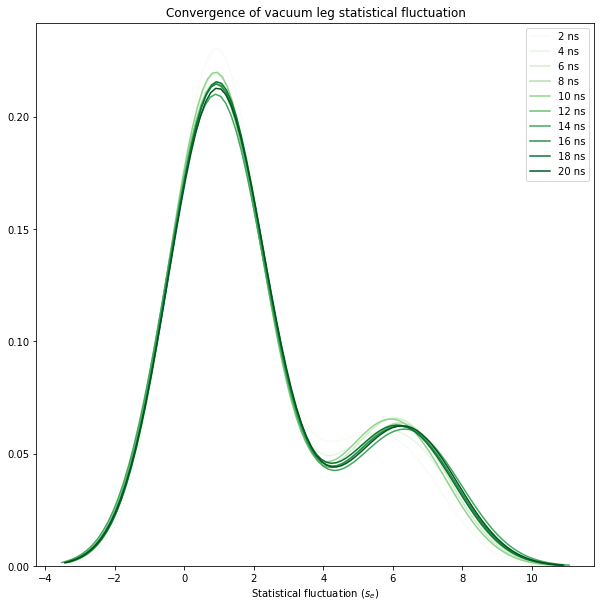

In [57]:
plt.figure(figsize=(10,10))

steps = len(all_sims[0].vacdg_history)

jump=2

cmap = plt.cm.get_cmap('Greens')
# kde makes it look like it can take on negative values
print('THIS PLOT MAKES IT LOOKS LIKE THE FLUX CAN BE NEGATIVE')
for (c,step) in zip(np.linspace(0.,1.,steps),range(1,steps+1,jump)):
    all_variances = [sim.vacvariance_history[step-1] for sim in all_sims]
    statistical_fluctuation = [var_to_statistical_fluc(x,step*stepsize) for x in all_variances]
    sns.kdeplot(statistical_fluctuation,color=cmap(c*jump),label=f'{step+1} ns')
#     sns.distplot(statistical_fluctuation,color=cmap(c*jump))
# plt.hist(statistical_fluctuation,color=cmap(c*jump),alpha=0.5)
plt.title('Convergence of vacuum leg statistical fluctuation')
plt.xlabel(r'Statistical fluctuation ($s_e$)')
plt.legend()
plt.show()

In [61]:
for sim in all_sims:
    print(sim.ligA)
    print(vars(sim))

0
{'ligA': '0', 'ligB': '2', 'directory': 'lig0to2', 'vacdg': 2.1816725507947297, 'vacvariance': 0.40332890083527106, 'soldg': 0.47392451468699015, 'solvariance': 0.25298131971710763, 'comdg': None, 'comvariance': None, 'vacdg_history': [-5.55644366803454, -5.55023262746066, -5.568396419373974, -5.560901248504015, -5.562821311432747, -5.564621067753491, -5.5648078624818424, -5.565971098446363, -5.5702247477362326, -5.572798195589271, -5.574356074633918, -5.572911887095825, -5.572372296630688, -5.570809577066045, -5.571130517975044, -5.569710997946497, -5.569280919577895, -5.5702425891973215, -5.568946550732607, -5.568290405334947], 'soldg_history': [-4.9733324882227175, -5.062957836693055, -5.223332452120754, -5.089527699375199, -5.080933568068093, -5.328140273456422, -5.200269598321391, -5.148618590211231, -5.235535232819898, -5.213894710998924, -5.286361544758911, -5.217320725498834, -5.2214440970359055, -5.213478582156636, -5.2416948465359665, -5.179314498189319, -5.216050123267587,

In [ ]:
# pick a point where it looks good, and then use this to make a matrix of variances, and then pass them into DiffNet
# with the diagonal set to something sensible

In [ ]:
# plot of dG

In [ ]:
# plot of other factors against statistical variance

In [ ]:
#lomap